In [2]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

2023-01-24 11:44:09.154236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

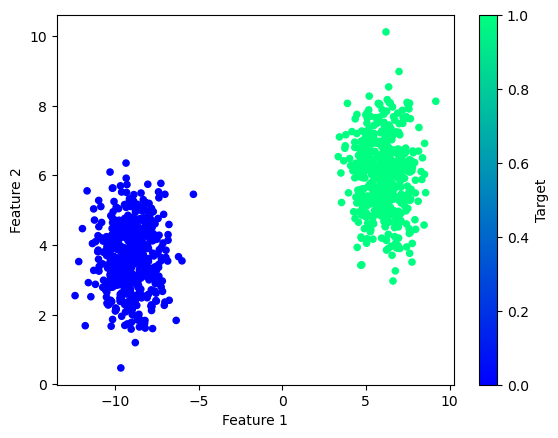

In [3]:
# Generate a dummy dataset
X, y = make_blobs(n_samples= 1000, centers = 2, n_features = 2, random_state = 78)

# Create DF with dummy data
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Plot the dummy data
df.plot.scatter(x='Feature 1', y = 'Feature 2', c = 'Target', colormap = 'winter')


In [4]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2023-01-24 11:44:15.574588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Add first Dense layer, including input layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation = 'relu', input_dim = 2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) 

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6353 - accuracy: 0.7880
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.8413
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.8720
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.9067
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.9320
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.9453
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.9613
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.9733
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.9813
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.9907
Epoch 11/

<AxesSubplot: >

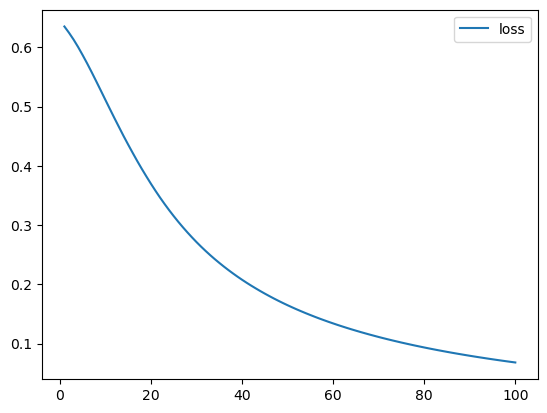

In [12]:
# Create a df containing training history
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))

# Plot the loss
history_df.plot(y = 'loss')

<AxesSubplot: >

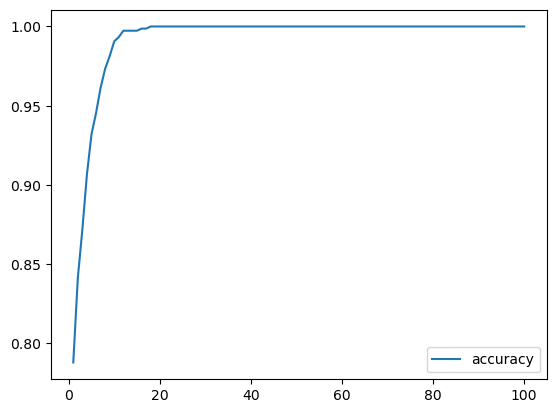

In [13]:
# Plot the accuracy
history_df.plot(y = 'accuracy')

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose = 2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.0704 - accuracy: 1.0000 - 215ms/epoch - 27ms/step
Loss: 0.07042503356933594, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of data
new_X, new_y = make_blobs(n_samples = 10, centers = 2, n_features = 2, random_state = 78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype('int32')
# Alt version? Confusing curriculum
# nn_model.predict_classes(new_X_scaled)

1/1 [==============================] - 0s 110ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

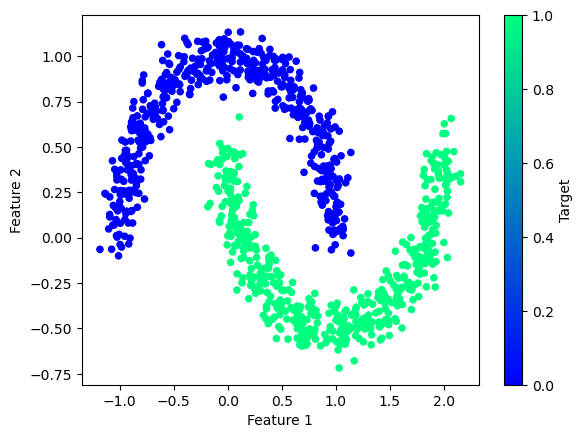

In [16]:
from sklearn.datasets import make_moons

# Create dummy nonlinear data
X_moons, y_moons = make_moons(n_samples = 1000, noise = 0.08, random_state = 78)

# Transform y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Create a DF to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns = ['Feature 1', 'Feature 2'])
df_moons['Target'] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x = 'Feature 1', y = 'Feature 2', c = 'Target', colormap = 'winter')

In [17]:
# Create training and testing split 
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state = 78)

In [18]:
# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Train the model with nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs = 100, shuffle = True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7529 - accuracy: 0.6307
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6573
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6680
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.6840
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.6973
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7093
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.7187
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7280
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7333
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7453
Epoch 11/

<AxesSubplot: >

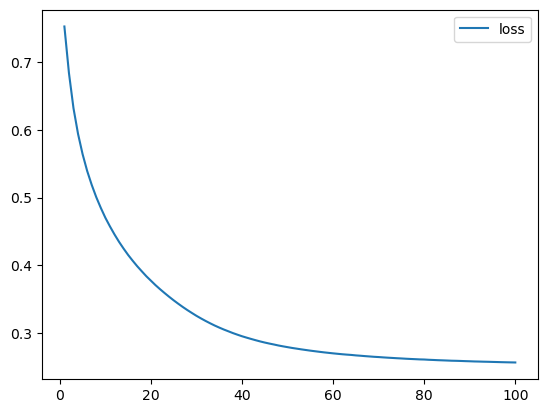

In [20]:
# Create DF containing training history
history_df = pd.DataFrame(model_moon.history, index = range(1, len(model_moon.history['loss'])+1))

# Plot the loss
history_df.plot(y = 'loss')

<AxesSubplot: >

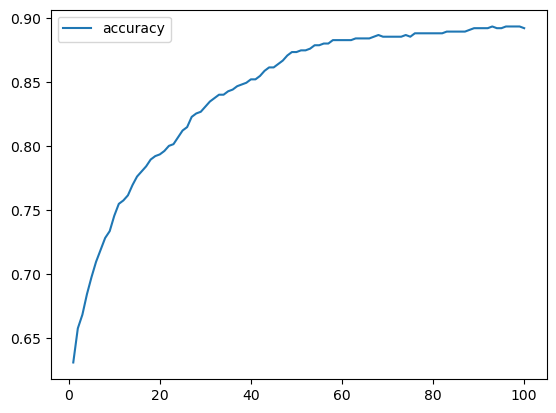

In [21]:
# Plot the accuracy
history_df.plot(y = 'accuracy')

In [22]:
# Changing structure of neural network model
# Generate new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation = 'relu', input_dim = number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs = 100, shuffle = True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6118 - accuracy: 0.5547
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.6320
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.8013
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.8533
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.8613
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.8653
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.8720
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8733
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8733
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8747
Epoch 11/